### The simplest allpass flter has one pole and one zero in the z-domain for the transfer function, 
## $$H_{ap}(z)= \frac{z^{−1}−\bar{a}}{1-az^{-1}} = \frac{-\bar{a} \cdot (1-\frac{z^{-1}}{\bar{a}})}{1-a\cdot z^{-1}}$$
where $a$ is a complex number, and ̄$\bar{a}$ specifies conjugate complex number. Observe that here we have a zero at, 

### $$z=\frac{1}{\bar{a}}$$ 
and a pole at, 
### $$z = a$$ 
**The pole and the zero are at conjugate reverse
locatons!**

### Example: If a = 0.5, we obtain the pole/zero plot with Python.

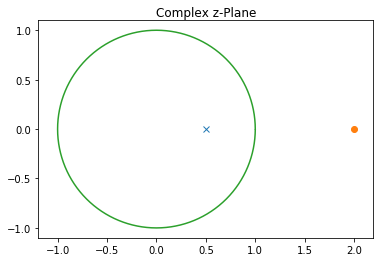

In [1]:
a=0.5;
B=[1/a.conjugate()]; #the numerator polynomial of H_AP
A=[a]; #the denominator polynomial

from zplane import zplane
zplane(B,A,[-1.1, 2.1, -1.1, 1.1]); #plot the pole/zero diagram with axis limits

In this plot, the cross at 0.5 is the pole, and the circle at 2 is the zero.

How can we see that the magnitude of the frequency response $H(e^{jΩ})$ is 1? We can re-write it as
### $$ H_{ap} (e^{jΩ}) = \frac{e^{-jΩ}-\bar{a}}{1-ae^{-jΩ}} = e^{-jΩ} \frac{1-\bar{a}e^{jΩ}}{1-ae^{-jΩ}} $$
Here you can see that the expression in the numerator is the conjugate complex of the denominator, hence their magnitude cancels to one. The exponental before the fracton also has magnitude 1, hence the entire expression has magnitude 1,
### $$∣H_{ap}(e^{jΩ})∣=1$$

Here we can see, using just one pole and one zero, we can obtain a magnitude of constant 1. More interesting now is the resultng phase. The phase function can be found in the book Oppenheim/Schafer, “Discrete Time Signal Processing”:
### $$ϕ(Ω)=−Ω−2arctan\left(\frac{r sin(Ω − θ)}{1- r cos(Ω-θ}\right)$$
where r is the magnitude of a and θ is the phase angle of $a$ (hence $a=r⋅e^{−jθ}$ ).


Observe that so far we assumed the phase to be linearly dependent on the frequency ( $ϕ(Ω)=−Ω⋅d$ ), and here we see it to be quite non-linear, with the trigonometric functons!

We can now plot the resultng phase over the normalized frequency, and compare it with the phase of a delay of 1 sample (of $z^−1$), where we get ϕ(Ω)=−Ω . This can be seen in the following plot, for r=0.5 and r=−0.5 :

![AllPassPhase](allpassphase.jpg)

Here, the blue line is the allpass phase for $r=0.5$, the green line for $r=-0.5$, and the red line is for $r=0$, the phase of a pure 1 sample delay $z^{−1}$. Here it can be seen that the beginning and end of the curves are identcal (at frequencies 0 and pi), and only in between the allpass phase deviates from the 1 sample delay! For $a=0$ the allpass indeed becomes identcal to $z^{−1}$, a delay of 1 sample. So we can see that it behaves very **similar to a delay.**

The plot was produced with a simple Python function for the phase function,

In [2]:
import numpy as np
def warpingphase(w, a):
    #produces (outputs) phase wy for an allpass filter
    #w: input vector of normlized frequencies (0..pi)
    #a: allpass coefficient
    #phase of allpass zero/pole :
    theta = np.angle(a);
    #magnitude of allpass zero/pole :
    r = np.abs(a);
    wy = -w-2*np.arctan((r*np.sin(w-theta))/(1-r*np.cos(w-theta)))
    return wy

The phase at the output of our phase functon can also be interpreted as a normalized frequency. This means its output can be the input of another warpingphase functon. An interestng observaton is, that the warpingphase functon with coefficient $-\bar{a}$ is the inverse of the warpingphase functon with coefficient $a$ !

We can try this in Python:

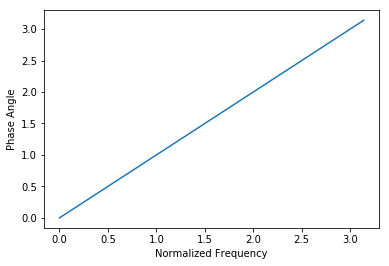

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
#from warpingphase import *
#frequency range:
w = np.arange(0,np.pi, 0.01)
a = 0.5 * (1+1j)
wyy = (warpingphase(warpingphase(w,a),-a.conjugate()))
plt.plot(w,wyy)
plt.xlabel('Normalized Frequency')
plt.ylabel('Phase Angle')

Here we see that it is indeed the identty functon. This shows that interpreting the allpass as a normalized frequency “warper”, the allpass with coefficient $a$ is inverse to the allpass with $-\bar{a}$.

What is the frequency response of an example allpass filter? 
For $a=0.5$, we can use freqz. Looking at the ztransform 
### $$ H_{ap}(z)=\frac{z^{−1}−\bar{a}}{1-az^{-1}} $$
we get our coefficient vectors to,

In [4]:
a=0.5;
B=[-a.conjugate(), 1]
A=[1, -a]

(observe that for freqz the higher exponents of $z^{-1}$ appear to the right)

Now plot the frequency response and impulse response:

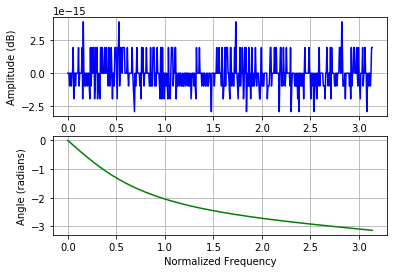

In [5]:
from freqz import freqz
freqz(B,A)

Here we can see in the above plot of the magnitude, that we indeed obtain a constant 1 (which is 0 dB, 2e-15 comes from the finite accuracy and rounding errors), and that we have the **non-linear** phase in the lower plot, as in the phase plots before.

To obtain the impulse response, we can use the functon “lfilter”, and input a unit impulse into it.

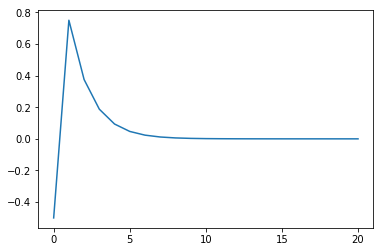

In [6]:
from scipy import signal as sp
Imp = np.zeros(21)
Imp[0] = 1
h = sp.lfilter(B, A, Imp)
plt.plot(h)
#we obtain the following impulse response plot

Here we can see that we have the frst, non-delayed, sample not at zero, but at -0.5. This can also be seen by plotng the first 4 elements of our impulse response:

In [7]:
print h[0:4]

[-0.5     0.75    0.375   0.1875]


The second element corresponds to the delay of 1 sample, our $z^{−1}$, with a factor of 0.75. But then there are more samples, going back into the past, exponentally decaying. This means, not only the past samples goes into our fltering calculaton, but also more past samples, and even the **non-delayed** sample, with a factor of -0.5. This is actually a problem for the so-called frequency warping (next secton), if we want to use frequency warping in IIR filters, because here we would get delay-less loops, which are difcult to implement! (With **FIR flters** this is no **problem though**)